In [ ]:
# Standard analytics packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#import csv files
url_allmovie = 'https://raw.githubusercontent.com/JihoonChung/MIE368_project/master/rotten_tomatoes_full.csv'
df_rotten_tomatoes_full = pd.read_csv(url_allmovie)
df_rotten_tomatoes_full = df_rotten_tomatoes_full.drop(columns = {'Unnamed: 0'})

In [ ]:
df_rotten_tomatoes_full.head()

,Title,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count,Year,Cast 1,Cast 2,Cast 3,director_name,Runtime,Genre_Action,Genre_Art&Foreign,Genre_Classics,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Kids&Family,Genre_Mystery,Genre_Romance,Genre_SciFi,Rating_G,Rating_NC17,Rating_NR,Rating_PG,Rating_PG-13,Rating_R,cast1_oscar_nom,cast1_oscars,cast2_oscar_nom,cast2_oscars,cast3_oscar_nom,cast3_oscars,cast1_FB_likes,cast2_FB_likes,cast3_FB_likes,dir_oscar_nom,dir_oscars,director_awards,director_facebook_likes,cast_total_facebook_likes
0,Drive,0.0,7,13.0,15,2011,Ryan Gosling,Carey Mulligan,Albert Brooks,Nicolas Winding Refn,100,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,2.0,0.0,1.0,0.0,1.0,0.0,33000.0,0.0,745.0,0.0,0.0,69.0,0.0,34337.0
1,American Son,50.0,24,47.0,282,2008,Nick Cannon,Melonie Diaz,Matt O'Leary,Neil Abramson,85,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,593.0,270.0,303.0,0.0,0.0,0.0,0.0,0.0
2,Primal,38.0,32,27.0,48,2010,Zoe Tuckwell-Smith,Krew Boylan,Lindsay Farris,Josh Reed,84,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Lion King,53.0,406,88.0,76333,1994,Matthew Broderick,Jeremy Irons,James Earl Jones,Roger Allers,87,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0.0,0.0,1.0,1.0,1.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,28.0,6458.0
4,The Kill Team,70.0,47,43.0,63,2014,Adam Winfield,Jeremy Morlock,Andrew Holmes,Dan Krauss,79,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Overall Dataset

In [ ]:
df_rotten_tomatoes_full.describe()

,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count,Year,Runtime,Genre_Action,Genre_Art&Foreign,Genre_Classics,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Kids&Family,Genre_Mystery,Genre_Romance,Genre_SciFi,Rating_G,Rating_NC17,Rating_NR,Rating_PG,Rating_PG-13,Rating_R,cast1_oscar_nom,cast1_oscars,cast2_oscar_nom,cast2_oscars,cast3_oscar_nom,cast3_oscars,cast1_FB_likes,cast2_FB_likes,cast3_FB_likes,dir_oscar_nom,dir_oscars,director_awards,director_facebook_likes,cast_total_facebook_likes
count,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000
mean,61.471595,82.963424,57.141634,7949.239689,2015.260700,101.314397,0.190661,0.122957,0.014786,0.199222,0.085603,0.563424,0.131518,0.044358,0.204669,0.081712,0.101167,0.006226,0.000778,0.412451,0.070817,0.164981,0.344747,0.534630,0.100389,0.335409,0.066926,0.217899,0.041245,1746.251362,803.456809,596.936965,0.098833,0.023346,7.372763,151.273152,986.772763
std,28.706027,99.728952,20.043959,19681.891442,8.600952,15.889832,0.392976,0.328516,0.120742,0.399571,0.279886,0.496154,0.338097,0.205969,0.403617,0.274032,0.301668,0.078688,0.027896,0.492467,0.256619,0.371307,0.475471,1.533049,0.357442,1.259988,0.295665,0.782892,0.214022,5143.426980,3501.187132,3137.166360,0.620552,0.195947,29.691803,1278.204326,8814.720257
min,0.000000,5.000000,5.000000,6.000000,1915.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,13.000000,42.000000,215.000000,2016.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,67.000000,36.000000,58.000000,788.000000,2017.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,88.000000,122.000000,73.000000,5265.000000,2017.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129.000000,45.000000,20.000000,0.000000,0.000000,0.000000,17.000000,0.000000
max,100.000000,501.000000,100.000000,234258.000000,2018.000000,222.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,3.000000,21.000000,3.000000,7.000000,2.000000,40000.000000,49000.000000,40000.000000,12.000000,3.000000,325.000000,22000.000000,261818.000000


Number of Oscar Winners

In [ ]:
wins_cast1= df_rotten_tomatoes_full["cast1_oscars"]>=1
wins_cast2= df_rotten_tomatoes_full["cast2_oscars"]>=1
wins_cast3= df_rotten_tomatoes_full["cast3_oscars"]>=1

wins_cast1=df_rotten_tomatoes_full[wins_cast1]
wins_cast2=df_rotten_tomatoes_full[wins_cast2]
wins_cast3=df_rotten_tomatoes_full[wins_cast3]
winners= pd.concat([wins_cast1,wins_cast2,wins_cast3])

num_winners=winners.shape[0]

print(num_winners)

228


Number of Oscar Nominees

In [ ]:
noms_cast1= df_rotten_tomatoes_full["cast1_oscar_nom"]>=1
noms_cast2= df_rotten_tomatoes_full["cast2_oscar_nom"]>=1
noms_cast3= df_rotten_tomatoes_full["cast3_oscar_nom"]>=1

noms_cast1=df_rotten_tomatoes_full[noms_cast1]
noms_cast2=df_rotten_tomatoes_full[noms_cast2]
noms_cast3=df_rotten_tomatoes_full[noms_cast3]
nominees= pd.concat([noms_cast1,noms_cast2,noms_cast3])

num_nominees=nominees.shape[0]

print(num_nominees)

572


Number of cast members who did not win any Oscars (either nominated or not)

In [ ]:
no_wins_cast1= df_rotten_tomatoes_full["cast1_oscars"]<=0
no_wins_cast2= df_rotten_tomatoes_full["cast2_oscars"]<=0
no_wins_cast3= df_rotten_tomatoes_full["cast3_oscars"]<=0

no_wins_cast1=df_rotten_tomatoes_full[no_wins_cast1]
no_wins_cast2=df_rotten_tomatoes_full[no_wins_cast2]
no_wins_cast3=df_rotten_tomatoes_full[no_wins_cast3]
no_winners= pd.concat([no_wins_cast1,no_wins_cast2,no_wins_cast3])

num_no_winners=no_winners.shape[0]

print(num_no_winners) 

3627


# Most/Least Popular Movie (Audience score)

In [ ]:
#2019 Horror movie is the most popular
max_score = df_rotten_tomatoes_full['AUDIENCE score'].max()
max_score_index = df_rotten_tomatoes_full['AUDIENCE score'].idxmax()
max_score_movie = df_rotten_tomatoes_full['Title'][max_score_index]
print(f'The movie with the highest audience score of {max_score} is {max_score_movie}')

The movie with the highest audience score of 100.0 is Haunt


In [ ]:
df_rotten_tomatoes_full[df_rotten_tomatoes_full.values  == "Haunt"]

,Title,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count,Year,Cast 1,Cast 2,Cast 3,director_name,Runtime,Genre_Action,Genre_Art&Foreign,Genre_Classics,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Kids&Family,Genre_Mystery,Genre_Romance,Genre_SciFi,Rating_G,Rating_NC17,Rating_NR,Rating_PG,Rating_PG-13,Rating_R,cast1_oscar_nom,cast1_oscars,cast2_oscar_nom,cast2_oscars,cast3_oscar_nom,cast3_oscars,cast1_FB_likes,cast2_FB_likes,cast3_FB_likes,dir_oscar_nom,dir_oscars,director_awards,director_facebook_likes,cast_total_facebook_likes
14,Haunt,71.0,42,100.0,8,2014,Harrison Gilbertson,Liana Liberato,Jacki Weaver,Mac Carter,86,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,2.0,0.0,174.0,0.0,401.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#2016 Drama/Action film least popular
min_score = df_rotten_tomatoes_full['AUDIENCE score'].min()
min_score_index = df_rotten_tomatoes_full['AUDIENCE score'].idxmin()
min_score_movie = df_rotten_tomatoes_full['Title'][min_score_index]
print(f'The movie with the lowest audience score of {min_score} is {min_score_movie}')

The movie with the lowest audience score of 5.0 is American Pastoral


In [ ]:
df_rotten_tomatoes_full[df_rotten_tomatoes_full.values  == "American Pastoral"]

,Title,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count,Year,Cast 1,Cast 2,Cast 3,director_name,Runtime,Genre_Action,Genre_Art&Foreign,Genre_Classics,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Kids&Family,Genre_Mystery,Genre_Romance,Genre_SciFi,Rating_G,Rating_NC17,Rating_NR,Rating_PG,Rating_PG-13,Rating_R,cast1_oscar_nom,cast1_oscars,cast2_oscar_nom,cast2_oscars,cast3_oscar_nom,cast3_oscars,cast1_FB_likes,cast2_FB_likes,cast3_FB_likes,dir_oscar_nom,dir_oscars,director_awards,director_facebook_likes,cast_total_facebook_likes
892,American Pastoral,50.0,118,5.0,764,2016,Ewan McGregor,Jennifer Connelly,Dakota Fanning,Ewan McGregor,126,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Weighted average audience score

In [ ]:
#find weighted average audience score

total_audience_count = df_rotten_tomatoes_full['AUDIENCE count'].sum()
weighted_average = 0

for i in range(len(df_rotten_tomatoes_full['AUDIENCE score'])):
  weighted_average += df_rotten_tomatoes_full['AUDIENCE score'][i] * df_rotten_tomatoes_full['AUDIENCE count'][i] /total_audience_count

print(weighted_average)


67.15033863209696


# Distributions

## KDE distribution of audience score and critics score

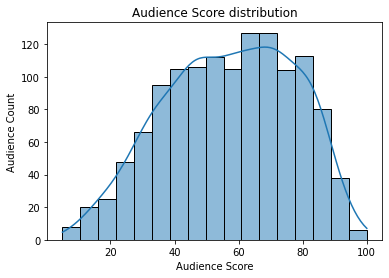

In [ ]:
sns.histplot(df_rotten_tomatoes_full["AUDIENCE score"],kde=True)
            
plt.title('Audience Score distribution')
plt.ylabel('Audience Count')
plt.xlabel('Audience Score')
plt.show()

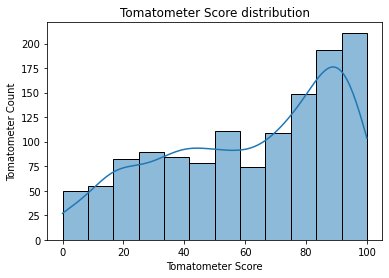

In [ ]:
sns.histplot(df_rotten_tomatoes_full["TOMATOMETER score"],kde=True)
            
plt.title('Tomatometer Score distribution')
plt.ylabel('Tomatometer Count')
plt.xlabel('Tomatometer Score')
plt.show()

## Histogram distribution of audience score  

### (with & without oscar winners)

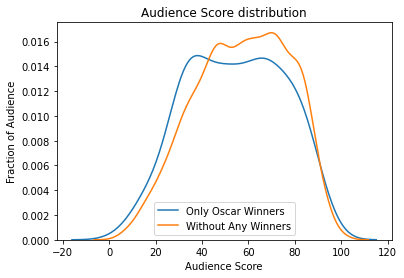

In [ ]:
sns.kdeplot(winners["AUDIENCE score"])
sns.kdeplot(no_winners["AUDIENCE score"])
            
plt.title('Audience Score distribution')
plt.ylabel('Fraction of Audience')
plt.xlabel('Audience Score')
plt.legend(["Only Oscar Winners", "Without Any Winners"])

plt.show()

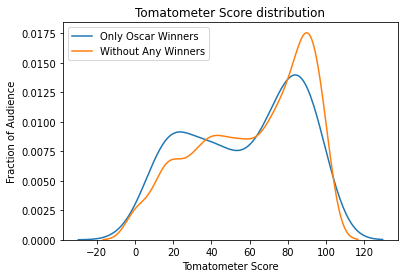

In [ ]:
sns.kdeplot(winners["TOMATOMETER score"])
sns.kdeplot(no_winners["TOMATOMETER score"])
            
plt.title('Tomatometer Score distribution')
plt.ylabel('Fraction of Audience')
plt.xlabel('Tomatometer Score')
plt.legend(["Only Oscar Winners", "Without Any Winners"])

plt.show()

# Jointplot Audience & Tomatometer Score

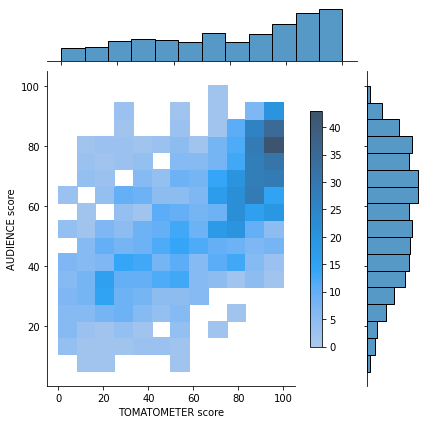

In [ ]:
j = sns.jointplot(data=df_rotten_tomatoes_full,  # Data frame to plot
                  x='TOMATOMETER score',  # x-axis data
                  y='AUDIENCE score',  # y-axis data
                  kind="hist",pthresh = .01,cbar = True,cbar_kws = dict(shrink = 0.75))

# Print the plot to the notebook
plt.show()

## Jointplot of runtime & audience score 

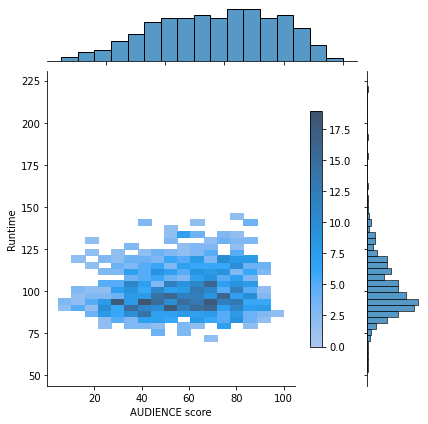

In [ ]:
j = sns.jointplot(data=df_rotten_tomatoes_full,  # Data frame to plot
                  x='AUDIENCE score',  # x-axis data
                  y='Runtime',  # y-axis data
                  kind='hist',pthresh = .01,cbar = True,cbar_kws = dict(shrink = 0.75))

# Print the plot to the notebook
plt.show()

## FacetGrid of Genre and Audience Sore

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


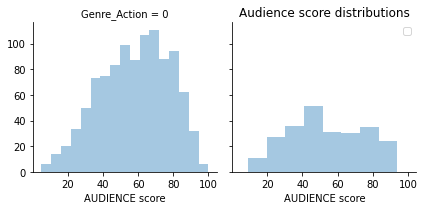

In [ ]:
g = sns.FacetGrid(data=df_rotten_tomatoes_full, col='Genre_Action',)

# Make a distplot in the 
g.map(sns.distplot, "AUDIENCE score",kde=False)

# Format plot area
plt.legend()
plt.title('Audience score distributions')
plt.show()

# Correlation Coefficient 

                           TOMATOMETER score  ...  cast_total_facebook_likes
TOMATOMETER score                   1.000000  ...                  -0.031985
TOMATOMETER Count                   0.155741  ...                   0.090352
AUDIENCE score                      0.579630  ...                   0.002350
AUDIENCE count                      0.072580  ...                   0.120909
Year                               -0.036190  ...                  -0.070453
Runtime                             0.038186  ...                   0.039401
Genre_Action                       -0.095726  ...                   0.147397
Genre_Art&Foreign                   0.114256  ...                  -0.041854
Genre_Classics                     -0.009204  ...                   0.053966
Genre_Comedy                       -0.009420  ...                  -0.024045
Genre_Documentary                   0.089289  ...                  -0.034080
Genre_Drama                         0.060728  ...                  -0.010323

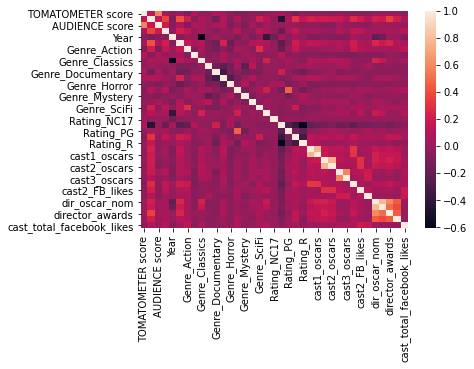

In [ ]:
# Calculate correlation coefficents
corr_df = df_rotten_tomatoes_full.corr()
print(corr_df)  # Print correlation coefficents to notebook

# Plot correlation coefficents in heat map
sns.heatmap(corr_df)
plt.show()

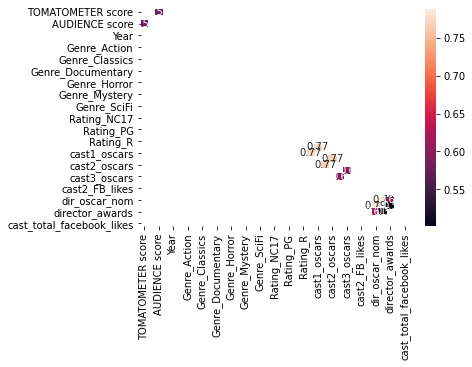

In [ ]:
corr=corr_df>=abs(0.5)

corr2=corr_df[corr]
corr2 = corr2[corr2 < 1]
sns.heatmap(corr2, annot=True)
plt.show()

In [ ]:
corr_df['AUDIENCE score'].sort_values(ascending=False)

AUDIENCE score               1.000000
TOMATOMETER score            0.579630
AUDIENCE count               0.201833
TOMATOMETER Count            0.168756
Runtime                      0.094474
Genre_Drama                  0.093072
Genre_Art&Foreign            0.087597
Genre_Documentary            0.063085
Genre_Romance                0.062406
Genre_Classics               0.055128
cast3_oscar_nom              0.049797
director_awards              0.046362
dir_oscar_nom                0.039949
Rating_G                     0.038944
dir_oscars                   0.029497
Rating_PG                    0.023637
director_facebook_likes      0.009706
Rating_PG-13                 0.005857
cast_total_facebook_likes    0.002350
Rating_NR                   -0.000242
Rating_NC17                 -0.004376
Genre_Comedy                -0.004790
Genre_Kids&Family           -0.010201
cast3_oscars                -0.011711
cast1_oscars                -0.016770
cast2_FB_likes              -0.019302
Rating_R    

In [ ]:
strongest_correlated_feature = pd.DataFrame(columns={'Feature', 'strongest_corr', 'abs_value'})
high_corr = abs(corr_df[corr_df < 1]).idxmax()
features = list(high_corr.index)
high_corr= high_corr.reset_index(drop=True)
value = abs(corr_df[corr_df < 1]).max().reset_index(drop=True)

strongest_correlated_feature['Feature'] = features
strongest_correlated_feature['strongest_corr'] = high_corr
strongest_correlated_feature['abs_value'] = value

strongest_correlated_feature

,Feature,abs_value,strongest_corr
0,TOMATOMETER score,0.579630,AUDIENCE score
1,TOMATOMETER Count,0.449064,Rating_NR
2,AUDIENCE score,0.579630,TOMATOMETER score
3,AUDIENCE count,0.369882,TOMATOMETER Count
4,Year,0.602920,Genre_Classics
5,Runtime,0.418876,TOMATOMETER Count
6,Genre_Action,0.297039,Genre_SciFi
7,Genre_Art&Foreign,0.114256,TOMATOMETER score
8,Genre_Classics,0.602920,Year
9,Genre_Comedy,0.216996,Genre_Drama
